# Coursework Assignment

## Importing Data and relevant libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, confusion_matrix, plot_confusion_matrix, classification_report, recall_score, precision_recall_curve
from scipy import stats
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [23]:
hotel = pd.read_csv("hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Cleaning

In [24]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
hotel['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [26]:
hotel['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [27]:
hotel = hotel.drop(['agent', 'company'], axis = 1)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [28]:
hotel.dropna(inplace = True)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [29]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:xlabel='adr', ylabel='Count'>

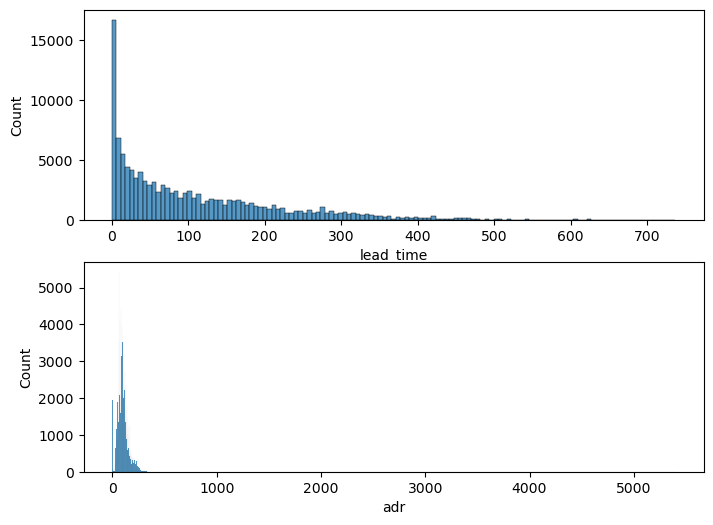

In [30]:
fig, ax = plt.subplots(2,1, figsize =(8,6))
sns.histplot(hotel['lead_time'], ax= ax[0])
sns.histplot(hotel['adr'], ax = ax[1])

In [31]:
hotel = hotel[(hotel['adr'] < 5300) & (hotel['adr'] >= 0)]
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000
mean,0.371350,104.311255,2016.157650,27.166818,15.800893,0.928879,2.502128,1.858389,0.104209,0.007948,0.032003,0.087143,0.131619,0.221160,2.330793,101.959594,0.061886,0.571693
std,0.483168,106.903696,0.707461,13.589932,8.780302,0.996181,1.900152,0.578580,0.399175,0.097381,0.176008,0.845876,1.484674,0.652766,17.630598,48.090374,0.244174,0.792681
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


<AxesSubplot:xlabel='adr', ylabel='Count'>

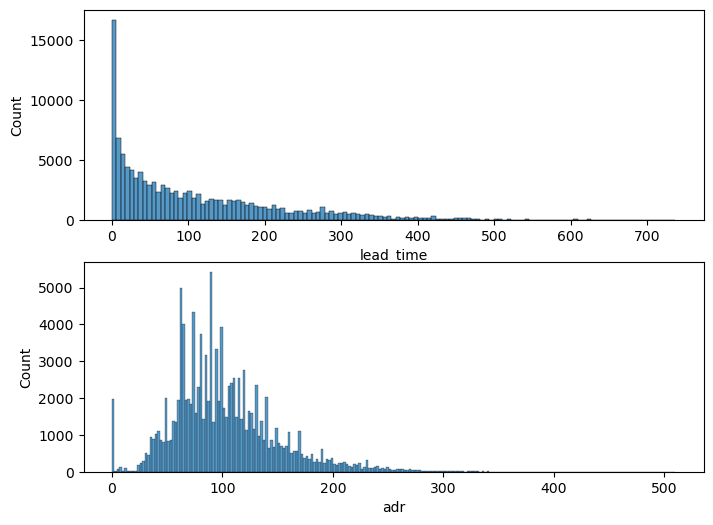

In [37]:
fig, ax = plt.subplots(2,1, figsize =(8,6))
sns.histplot(hotel['lead_time'], ax= ax[0])
sns.histplot(hotel['adr'], ax = ax[1])

In [36]:
hotel[hotel['adr'] == 0]['market_segment'].value_counts()

Complementary    671
Online TA        366
Offline TA/TO    330
Groups           251
Direct           238
Corporate         76
Aviation           6
Name: market_segment, dtype: int64

In [7]:
hotel.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [7]:
hotel['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [15]:
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117429 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117429 non-null  object        
 1   is_canceled                     117429 non-null  int64         
 2   lead_time                       117429 non-null  int64         
 3   arrival_date_year               117429 non-null  int64         
 4   arrival_date_month              117429 non-null  object        
 5   arrival_date_week_number        117429 non-null  int64         
 6   arrival_date_day_of_month       117429 non-null  int64         
 7   stays_in_weekend_nights         117429 non-null  int64         
 8   stays_in_week_nights            117429 non-null  int64         
 9   adults                          117429 non-null  int64         
 10  children                        117425 non-null  float64

## Exploratory Data Analysis and Visualization

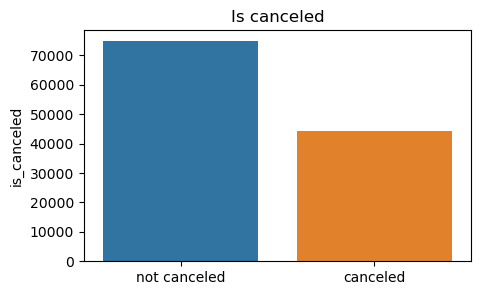

In [38]:
fig, ax = plt.subplots(figsize = (5,3))
sns.barplot(x =['not canceled', 'canceled'], y =hotel['is_canceled'].value_counts())
plt.title('Is canceled')
plt.show()

In [41]:
hotel['is_canceled'].value_counts()

0    74744
1    44152
Name: is_canceled, dtype: int64

In [8]:
hotel['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

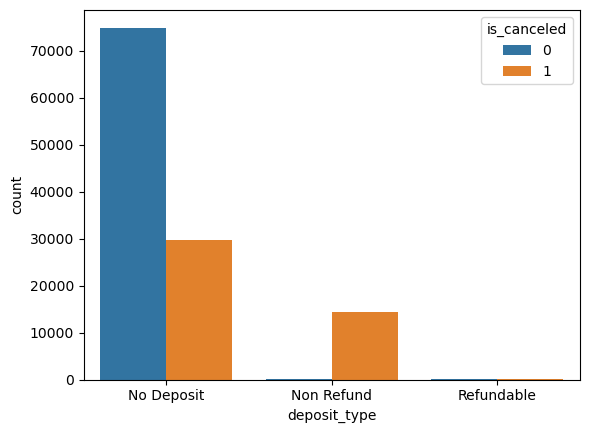

In [10]:
deposit_type = hotel.groupby(['deposit_type', 'is_canceled']).size().reset_index(name = 'count')
sns.barplot(x = 'deposit_type', y = 'count', hue = 'is_canceled', data = deposit_type)
plt.show()

In [12]:
view = hotel[hotel['deposit_type'] == 'Non Refund']
view['reservation_status'].value_counts()

Canceled     14460
Check-Out       93
No-Show         34
Name: reservation_status, dtype: int64

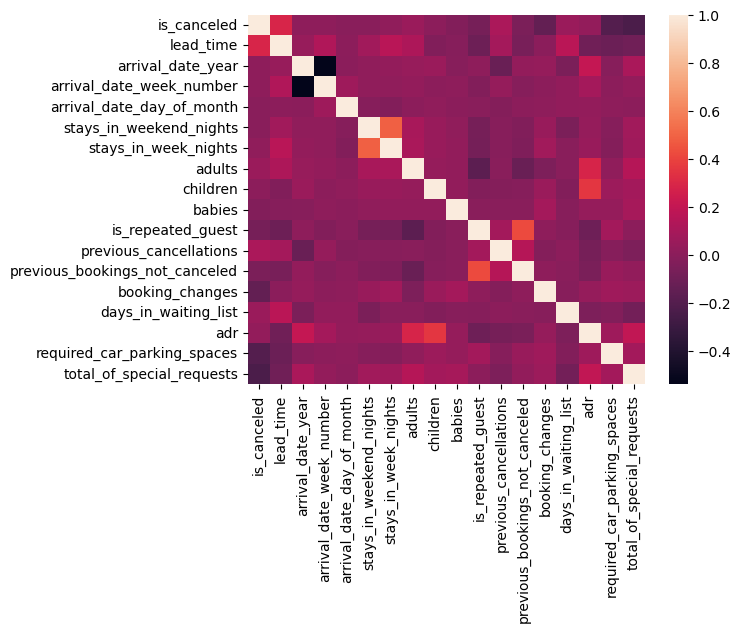

In [18]:
num_col = hotel.select_dtypes(include = ['int64', 'float64']).columns.tolist()
num_data = hotel[num_col]
corr = num_data.corr()
sns.heatmap(corr)
plt.show()

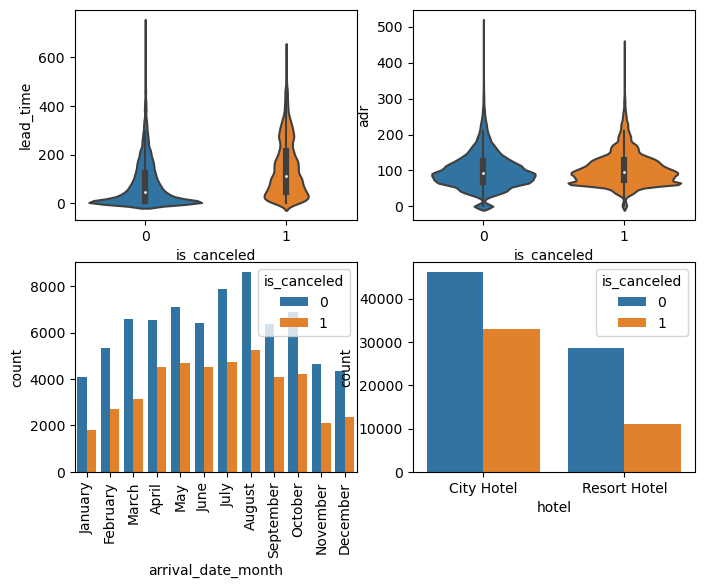

In [46]:
fig, ax = plt.subplots(2,2, figsize= (8,6))
sns.violinplot(x = 'is_canceled', y = 'lead_time', data = hotel, ax = ax[0,0])
sns.violinplot(x = 'is_canceled', y='adr', data = hotel,  ax = ax[0,1])
months = hotel.groupby(['arrival_date_month', 'is_canceled']).size().reset_index(name='count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x = 'arrival_date_month', y = 'count', hue = 'is_canceled', data = months, order = month_order, ax = ax[1,0])
ax[1,0].set_xticklabels(labels= month_order, rotation = 90)
hotel_type = hotel.groupby(['hotel', 'is_canceled']).size().reset_index(name = 'count')
sns.barplot(x = 'hotel', y = 'count', hue = 'is_canceled', data = hotel_type, ax = ax[1,1])
plt.show()

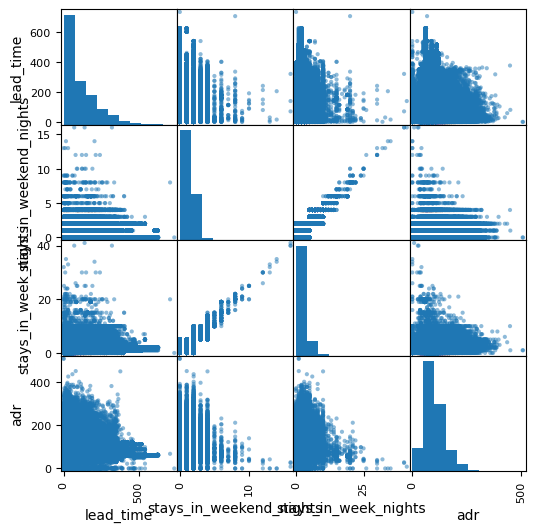

In [45]:
numeric_vars = hotel[['lead_time', 'stays_in_weekend_nights','stays_in_week_nights', 'adr' ]]
pd.plotting.scatter_matrix(numeric_vars, figsize = (6,6))
plt.show()

In [20]:
percentage_canceled = pd.pivot_table(hotel_type, values='count', index = 'hotel', columns ='is_canceled' )
percentage_canceled['canceled_percentage'] = percentage_canceled[1] / (percentage_canceled[0] + percentage_canceled[1]) * 100
percentage_canceled

is_canceled,0,1,canceled_percentage
hotel,,,
City Hotel,45147,32954,42.194082
Resort Hotel,27862,10995,28.296060


In [21]:
percentage_canceled = pd.pivot_table(months, values='count', index = 'arrival_date_month', columns ='is_canceled' )
percentage_canceled['canceled_percentage'] = percentage_canceled[1] / (percentage_canceled[0] + percentage_canceled[1]) * 100
percentage_canceled = percentage_canceled.sort_values('canceled_percentage', ascending= False)
percentage_canceled

is_canceled,0,1,canceled_percentage
arrival_date_month,,,
June,6285,4522,41.843250
April,6418,4496,41.194796
May,6940,4659,40.167256
September,6234,4076,39.534433
October,6673,4191,38.576951
August,8463,5223,38.163086
July,7742,4717,37.860181
December,4164,2350,36.076144
February,5192,2676,34.011185


In [22]:
hotel['reservation_status'].value_counts()

Check-Out    73009
Canceled     42772
No-Show       1177
Name: reservation_status, dtype: int64

In [24]:
hotel['meal'].value_counts()

BB           90375
HB           14233
SC           10440
Undefined     1128
FB             782
Name: meal, dtype: int64

In [25]:
object_col = hotel.describe(include = 'object').columns
for objects in hotel[object_col]:
    print(objects)
    print(hotel[objects].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['GBR' 'PRT' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'ISR' 'CYM'
 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV' 'HKG'
 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT' 'NGA'
 'MDV' 'VEN' 'SVK' 'AGO' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL' 'BHS'
 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' '

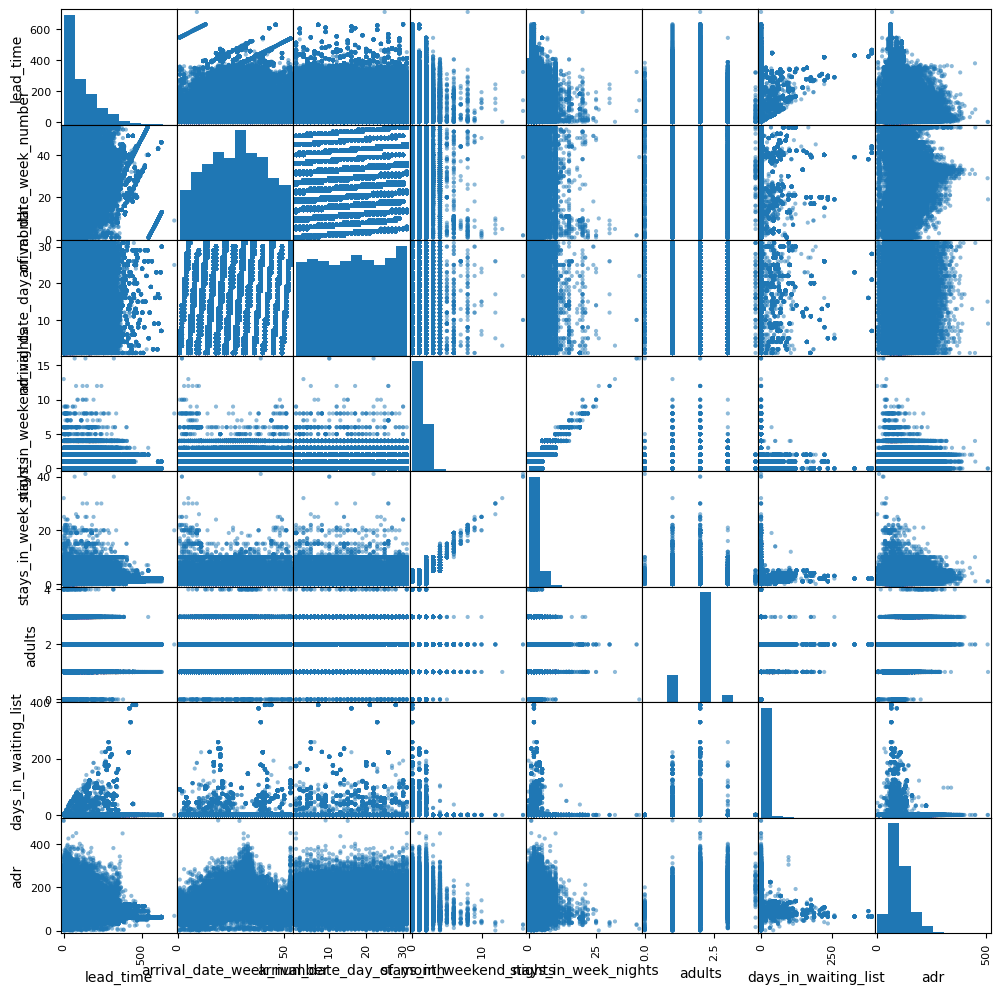

In [26]:
numeric_vars = hotel[['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights','stays_in_week_nights', 'adults', 'days_in_waiting_list', 'adr' ]]
pd.plotting.scatter_matrix(numeric_vars, figsize = (12,12))
plt.show()

array([[<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>,
        <AxesSubplot:title={'center':'arrival_date_day_of_month'}>],
       [<AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'adr'}>, <AxesSubplot:>]],
      dtype=object)

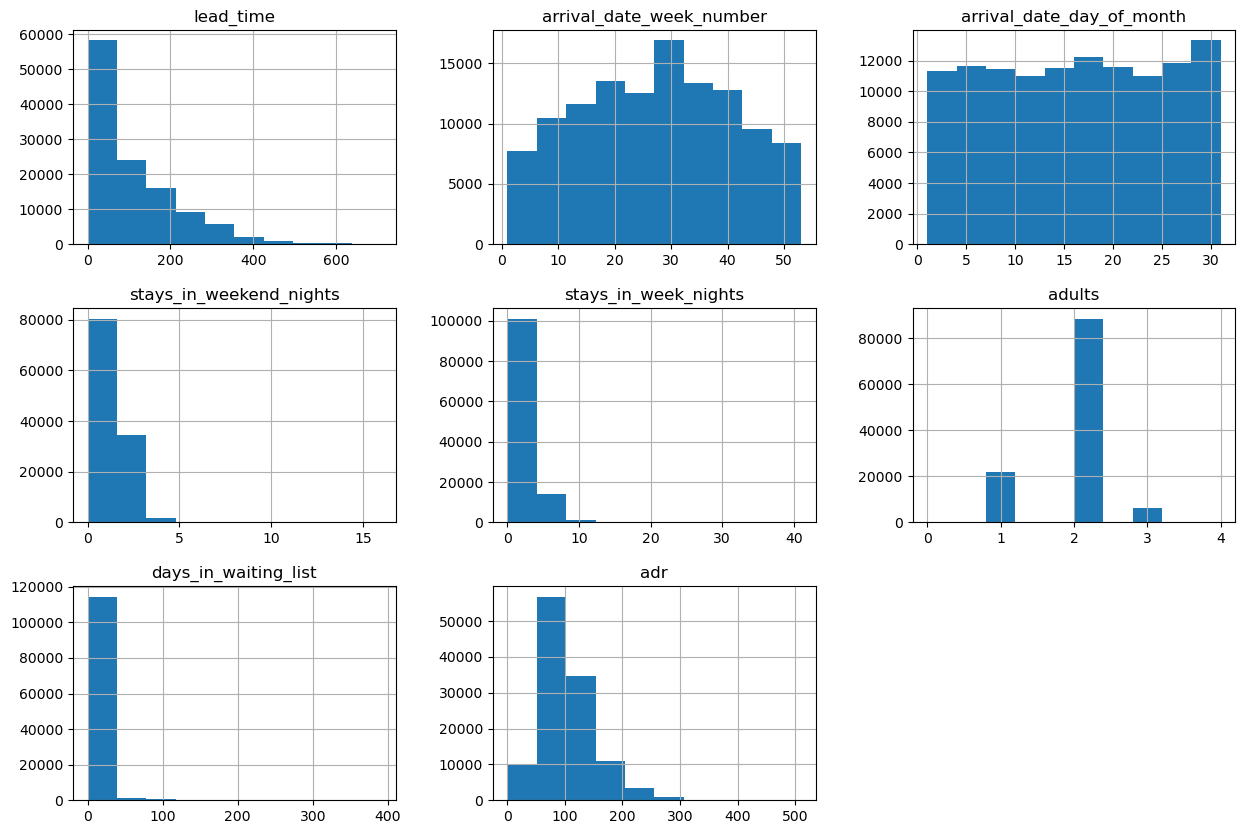

In [27]:
numeric_vars.hist(figsize = (15,10))

In [28]:
numeric_vars.describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,days_in_waiting_list,adr
count,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000
mean,105.376879,27.138109,15.805050,0.937687,2.522974,1.862438,2.347373,103.649070
std,106.944356,13.561162,8.783049,0.993329,1.885574,0.481129,17.712061,46.646454
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.260000
25%,19.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,71.000000
50%,71.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,95.000000
75%,162.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,126.000000
max,709.000000,53.000000,31.000000,16.000000,41.000000,4.000000,391.000000,510.000000


C:\Users\Juanma\AppData\Local\Temp\ipykernel_186500\2267137344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_vars['lead_time'] = np.log(numeric_vars['lead_time'] + 1e-8)
C:\Users\Juanma\AppData\Local\Temp\ipykernel_186500\2267137344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_vars['stays_in_weekend_nights'] = np.log(numeric_vars['stays_in_weekend_nights'] + + 1e-8)
C:\Users\Juanma\AppData\Local\Temp\ipykernel_186500\2267137344.py:3: SettingWithCopyWarning: 
A value is trying to

array([[<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>,
        <AxesSubplot:title={'center':'arrival_date_day_of_month'}>],
       [<AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'adr'}>, <AxesSubplot:>]],
      dtype=object)

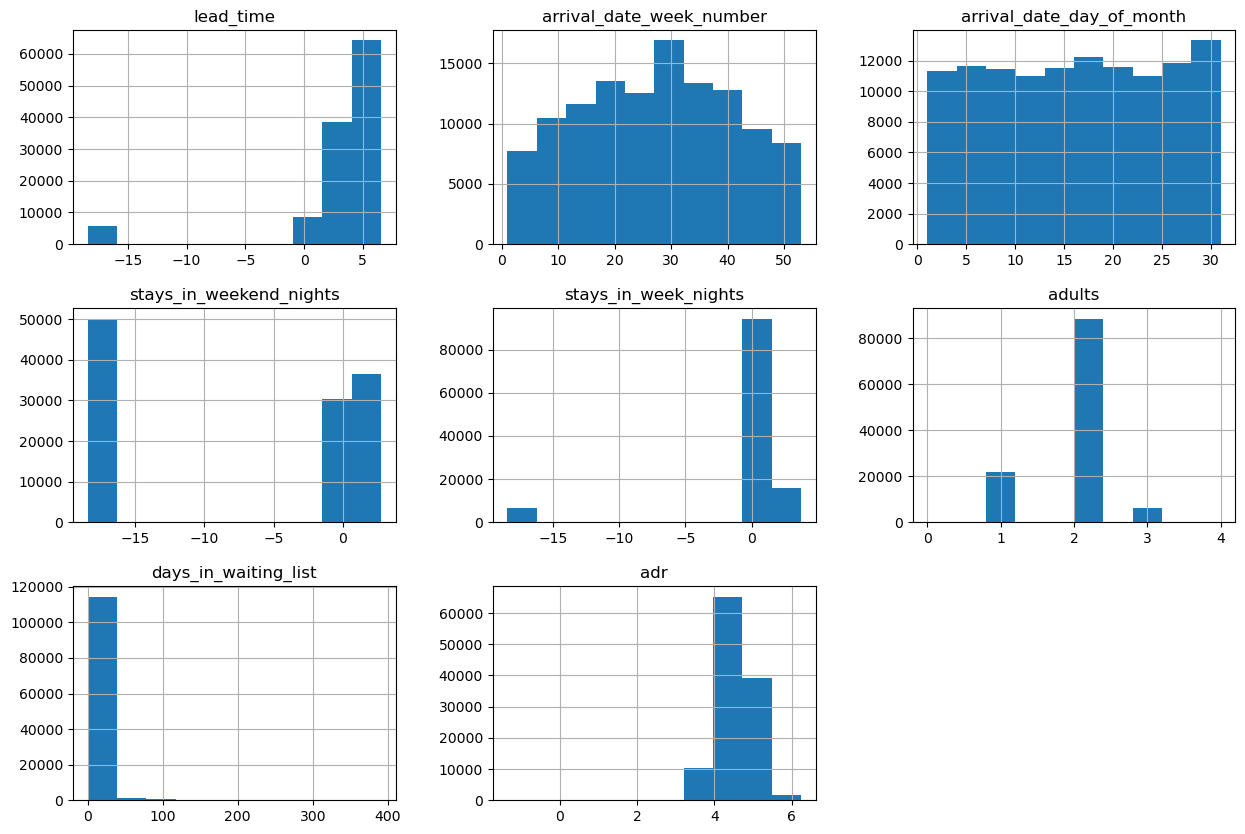

In [29]:
numeric_vars['lead_time'] = np.log(numeric_vars['lead_time'] + 1e-8)
numeric_vars['stays_in_weekend_nights'] = np.log(numeric_vars['stays_in_weekend_nights'] + + 1e-8)
numeric_vars['stays_in_week_nights'] = np.log(numeric_vars['stays_in_week_nights'] + + 1e-8)
numeric_vars['adr'] = np.log(numeric_vars['adr'])
numeric_vars.hist(figsize = (15,10))

## Regression

In [30]:
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date', 'deposit_type', 'assigned_room_type', 'days_in_waiting_list', 'babies'], axis=1)
y = hotel['adr']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month']
label_enc = ['country']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])
enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_encoded = sm.add_constant(X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)


reg1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = reg1.predict(X_test)
reg1.summary()

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     2826.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:45:34   Log-Likelihood:            -4.4719e+05
No. Observations:               93566   AIC:                         8.945e+05
Df Residuals:                   93512   BIC:                         8.950e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.323e+04    165.940    -79.747      0.000   -1.36e+04   -1.29e+04
is_canceled                        6.3944      0.236     27.145      0.000       5.933       6.856
lead_time                         -0.0943      0.001    -84.926      0.000      -0.097      -0.092
arrival_date_year                 16.3829      0.203     80.595      0.000      15.984      16.781
arrival_date_week_number          -0.4157      0.244     -1.702      0.089      -0.895       0.063
arrival_date_day_of_month          0.2043      0.037      5.564      0.000       0.132       0.276
stays_in_weekend_nights           -1.6231      0.111    -14.650      0.000      -1.840      -1.406
stays_in_week_nights               0.4466      0.060      7.395      0.000       0.328       0.565
adults                             9.7217      0.223     43.629      0.000       9.285      10.158
children                          12.0610      0.317     38.036      0.000      11.440      12.683
country                            0.0250      0.002     10.448      0.000       0.020       0.030
is_repeated_guest                 -8.6755      0.664    -13.064      0.000      -9.977      -7.374
previous_cancellations            -0.7273      0.115     -6.342      0.000      -0.952      -0.503
previous_bookings_not_canceled    -0.5338      0.076     -7.058      0.000      -0.682      -0.386
booking_changes                    1.3214      0.154      8.591      0.000       1.020       1.623
required_car_parking_spaces        6.5173      0.408     15.976      0.000       5.718       7.317
total_of_special_requests          1.8936      0.138     13.713      0.000       1.623       2.164
hotel_City Hotel               -6603.5362     82.973    -79.586      0.000   -6766.163   -6440.910
hotel_Resort Hotel             -6629.6672     82.967    -79.908      0.000   -6792.281   -6467.053
meal_BB                        -2666.1543     33.187    -80.338      0.000   -2731.200   -2601.109
meal_FB                        -2620.7798     33.158    -79.040      0.000   -2685.769   -2555.791
meal_HB                        -2638.8201     33.177    -79.538      0.000   -2703.846   -2573.794
meal_SC                        -2682.0299     33.218    -80.739      0.000   -2747.138   -2616.922
meal_Undefined                 -2625.4193     33.232    -79.004      0.000   -2690.553   -2560.286
market_segment_Aviation        -1883.7977     23.801    -79.147      0.000   -1930.448   -1837.148
market_segment_Complementary   -1938.0163     24.007    -80.728      0.000   -1985.069   -1890.963
market_segment_Corporate       -1887.2026     23.698    -79.635      0.000   -1933.651   -1840.754
market_segment_Direct          -1876.0470     23.720    -79.092      0.000   -1922.538   -1829.556
market_segment

In [31]:
mse_train = mean_squared_error(y_train,reg1.predict(X_train) )
print("train error: ", mse_train)
mse_test = mean_squared_error(y_test, y_pred)
print("test_error: ", mse_test)

train error:  829.5059516915511
test_error:  862.3653615503704


In [32]:
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date', 'deposit_type', 'assigned_room_type', 'days_in_waiting_list', 'distribution_channel', 'babies'], axis=1)
y_2 = np.log(hotel['adr'])

one_hot = ['hotel', 'meal', 'market_segment', 'customer_type','reserved_room_type', 'arrival_date_month']
label_enc = ['country']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])
enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded_2 = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_encoded_2 = sm.add_constant(X_encoded_2)
X_train, X_test, y_train, y_test = train_test_split(X_encoded_2, y_2.reset_index(drop = True), test_size = 0.2, random_state = 100)


reg2 = sm.OLS(y_train, X_train).fit()
y_pred = reg2.predict(X_test)
reg2.summary()

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     2741.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:45:35   Log-Likelihood:                -19080.
No. Observations:               93566   AIC:                         3.826e+04
Df Residuals:                   93516   BIC:                         3.873e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -127.0571      1.855    -68.497      0.000    -130.693    -123.421
is_canceled                        0.0586      0.002     24.156      0.000       0.054       0.063
lead_time                         -0.0008   1.14e-05    -68.934      0.000      -0.001      -0.001
arrival_date_year                  0.1463      0.002     69.993      0.000       0.142       0.150
arrival_date_week_number           0.0048      0.003      1.912      0.056      -0.000       0.010
arrival_date_day_of_month          0.0007      0.000      1.769      0.077   -7.22e-05       0.001
stays_in_weekend_nights           -0.0156      0.001    -13.677      0.000      -0.018      -0.013
stays_in_week_nights               0.0050      0.001      7.996      0.000       0.004       0.006
adults                             0.0942      0.002     41.150      0.000       0.090       0.099
children                           0.0717      0.003     21.963      0.000       0.065       0.078
country                            0.0002   2.46e-05      8.005      0.000       0.000       0.000
is_repeated_guest                 -0.1111      0.007    -16.246      0.000      -0.124      -0.098
previous_cancellations            -0.0217      0.001    -18.415      0.000      -0.024      -0.019
previous_bookings_not_canceled    -0.0037      0.001     -4.727      0.000      -0.005      -0.002
booking_changes                    0.0034      0.002      2.180      0.029       0.000       0.007
required_car_parking_spaces        0.0798      0.004     18.996      0.000       0.072       0.088
total_of_special_requests          0.0176      0.001     12.408      0.000       0.015       0.020
hotel_City Hotel                 -63.3444      0.927    -68.297      0.000     -65.162     -61.527
hotel_Resort Hotel               -63.7127      0.927    -68.698      0.000     -65.530     -61.895
meal_BB                          -25.6428      0.371    -69.124      0.000     -26.370     -24.916
meal_FB                          -25.1138      0.371    -67.754      0.000     -25.840     -24.387
meal_HB                          -25.3619      0.371    -68.387      0.000     -26.089     -24.635
meal_SC                          -25.7821      0.371    -69.437      0.000     -26.510     -25.054
meal_Undefined                   -25.1564      0.371    -67.730      0.000     -25.884     -24.428
market_segment_Aviation          -17.9345      0.266    -67.390      0.000     -18.456     -17.413
market_segment_Complementary     -19.3091      0.268    -72.104      0.000     -19.834     -18.784
market_segment_Corporate         -18.0494      0.265    -68.083      0.000     -18.569     -17.530
market_segment_Direct            -17.8554      0.265    -67.371      0.000     -18.375     -17.336
market_segment

In [33]:
mse_train = mean_squared_error(y_train,reg2.predict(X_train) )
print("train error: ", mse_train)
mse_test = mean_squared_error(y_test, y_pred)
print("test_error: ", mse_test)

train error:  0.08803350177251457
test_error:  0.0884733500764334


Text(0.5, 1.0, 'QQ Plot for Model 2')

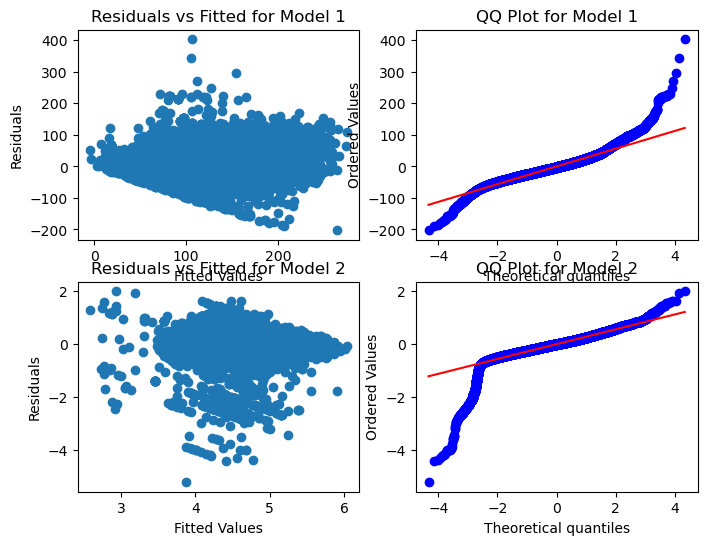

In [34]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
ax[0,0].scatter(reg1.fittedvalues, reg1.resid)
ax[0,0].set_xlabel('Fitted Values')
ax[0,0].set_ylabel('Residuals')
ax[0,0].set_title('Residuals vs Fitted for Model 1')

stats.probplot(reg1.resid, plot=ax[0,1])
ax[0,1].set_title('QQ Plot for Model 1')

ax[1,0].scatter(reg2.fittedvalues, reg2.resid)
ax[1,0].set_xlabel('Fitted Values')
ax[1,0].set_ylabel('Residuals')
ax[1,0].set_title('Residuals vs Fitted for Model 2')

stats.probplot(reg2.resid, plot=ax[1,1])
ax[1,1].set_title('QQ Plot for Model 2')

In [64]:
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date', 'country', 'deposit_type', 'country', 'assigned_room_type', 'days_in_waiting_list'], axis=1)
y = hotel['adr']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month']
label_enc = ['reserved_room_type', 'arrival_date_month']

enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 100)

rf = RandomForestRegressor(max_features = 'sqrt')

param_grid = {
    'n_estimators': [100,200],
    'max_depth': [10,20,30],
    'min_samples_split': [2,5,10],
}
grid_search = GridSearchCV(
    rf, param_grid, cv = 3, n_jobs = -1, scoring = 'neg_mean_squared_error')
grid_search.fit(X_encoded,y)
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean squared error:', -grid_search.best_score_)

Best hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Best mean squared error: 1175.4158999808244


In [65]:
rf = RandomForestRegressor(max_features = 'sqrt', max_depth = 30, min_samples_split = 2, n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

231.50935803800783

In [66]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Variable importances:")
print(importances)

Variable importances:
arrival_date_week_number          0.121650
reserved_room_type_A              0.070855
lead_time                         0.068119
arrival_date_month_August         0.061415
children                          0.053562
adults                            0.046560
hotel_City Hotel                  0.043867
hotel_Resort Hotel                0.043821
arrival_date_day_of_month         0.040783
arrival_date_year                 0.040046
market_segment_Online TA          0.035691
arrival_date_month_July           0.026280
stays_in_week_nights              0.024599
meal_HB                           0.021202
reserved_room_type_F              0.018481
market_segment_Offline TA/TO      0.016908
reserved_room_type_G              0.016856
market_segment_Groups             0.015931
stays_in_weekend_nights           0.015501
meal_BB                           0.015277
total_of_special_requests         0.014867
reserved_room_type_D              0.014129
booking_changes                 

In [67]:
gb = GradientBoostingRegressor(random_state = 100)

param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3,4,5],
    'n_estimators': [100,500]
}

grid_searchgb = GridSearchCV(gb, param_grid=param_grid, cv=3, n_jobs=-1)
grid_searchgb.fit(X_encoded, y)

print('Best parameters:', grid_searchgb.best_params_)
print('Best score:', grid_searchgb.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}
Best score: 0.5359569308919225


In [68]:
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date', 'country', 'deposit_type', 'country', 'assigned_room_type', 'days_in_waiting_list'], axis=1)
y = hotel['adr']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month']
label_enc = ['reserved_room_type', 'arrival_date_month']

enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 100)

gb = GradientBoostingRegressor(
    learning_rate = grid_searchgb.best_params_['learning_rate'], 
    max_depth = grid_searchgb.best_params_['max_depth'], 
    n_estimators = grid_searchgb.best_params_['n_estimators'], random_state = 100)
gb.fit(X_train, y_train)
y_preds = gb.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

306.1271831401332

In [69]:
importances = gb.feature_importances_
features = list(X.columns)
feature_importances = list(zip(features, importances))
print("Feature importances:")
for feature in feature_importances:
    print(feature[0], ": ", feature[1])

Feature importances:
hotel :  0.0027660530508139443
is_canceled :  0.053150046082285796
lead_time :  0.05660976140085551
arrival_date_year :  0.16373527767096605
arrival_date_month :  0.014077366659893311
arrival_date_week_number :  0.0025544343592591775
arrival_date_day_of_month :  0.0029955348916318567
stays_in_weekend_nights :  0.052331690329279895
stays_in_week_nights :  0.05832743148723692
adults :  0.00010110282264069044
children :  0.00025345570131302375
babies :  0.0010806447840782318
meal :  0.0015725734262397836
market_segment :  0.0005896950647768113
distribution_channel :  0.0016563095376190872
is_repeated_guest :  0.001304406304027825
previous_cancellations :  0.059229228575016224
previous_bookings_not_canceled :  0.07250914390059565
reserved_room_type :  0.017362711840153883
booking_changes :  0.0008568554249043498
customer_type :  0.024775277336793723
required_car_parking_spaces :  0.005007261546019637
total_of_special_requests :  0.0013516449779480515


## Classification

In [70]:
X = hotel.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'country', 'deposit_type', 'country', 'assigned_room_type', 'days_in_waiting_list'], axis=1)
y = hotel['is_canceled']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month']
label_enc = ['reserved_room_type', 'arrival_date_month']

enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

lr = LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best hyperparameters:", grid_search.best_params_)

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
162 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


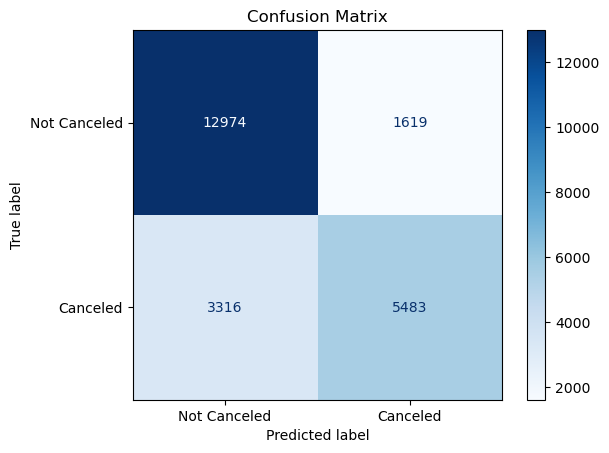

In [71]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     14593
           1       0.77      0.62      0.69      8799

    accuracy                           0.79     23392
   macro avg       0.78      0.76      0.76     23392
weighted avg       0.79      0.79      0.78     23392



In [73]:
X = hotel.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'country', 'deposit_type', 'country', 'assigned_room_type', 'days_in_waiting_list'], axis=1)
y = hotel['is_canceled']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month']
label_enc = ['reserved_room_type', 'arrival_date_month']

enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 4, 5, 6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 4, 5],
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,  cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 3}


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


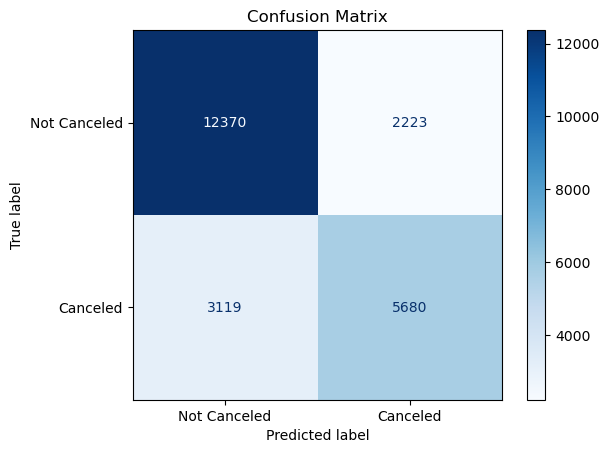

In [74]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82     14593
           1       0.72      0.65      0.68      8799

    accuracy                           0.77     23392
   macro avg       0.76      0.75      0.75     23392
weighted avg       0.77      0.77      0.77     23392



In [76]:
base_estimator = best_model
param_grid = {
    'n_estimators': [10,50,100],
    'max_samples': [0.5, 1],
    'max_features': [0.5, 1]
}

bagging = BaggingClassifier(base_estimator = base_estimator)
grid_search = GridSearchCV(estimator = bagging, param_grid = param_grid, cv = 3, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}
Best score: 0.7909710529182368


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


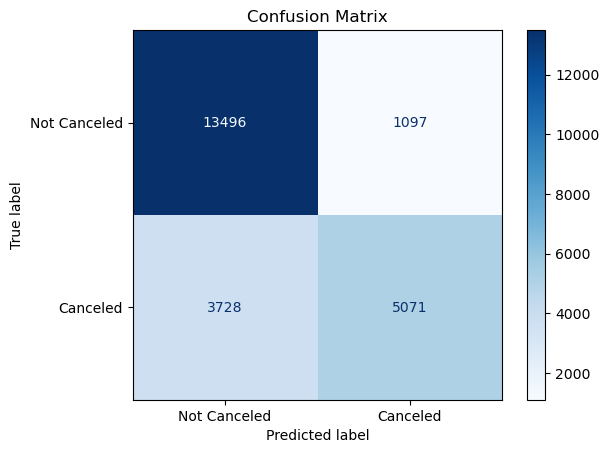

In [77]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85     14593
           1       0.82      0.58      0.68      8799

    accuracy                           0.79     23392
   macro avg       0.80      0.75      0.76     23392
weighted avg       0.80      0.79      0.78     23392



In [79]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define random forest classifier
rfc = RandomForestClassifier()

# Create grid search object with cross-validation
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=3, scoring='recall')

# Fit grid search object to data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


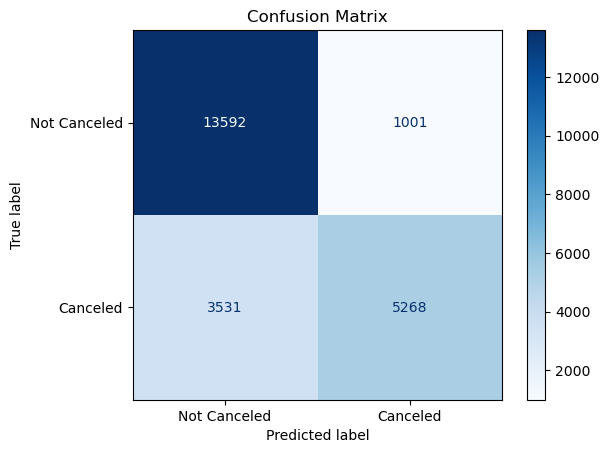

In [80]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86     14593
           1       0.84      0.60      0.70      8799

    accuracy                           0.81     23392
   macro avg       0.82      0.77      0.78     23392
weighted avg       0.81      0.81      0.80     23392



## Unsupervised Learning

In [ ]:
X = hotel.drop(['reservation_status', 'reservation_status_date', 'country', 'deposit_type', 'country', 'assigned_room_type', 'days_in_waiting_list'], axis=1)


one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month']

enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

kmeans = KMeans(n_clusters = 5, random_state =100) 
kmeans.fit(X_scaled)

labels = kmeans.labels_
pd.Series(labels).value_counts()

In [ ]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='deep')

In [ ]:
ks = range(5, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state = 100)
    
    # Fit model to samples
    model.fit(X_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
X = hotel.drop(['reservation_status', 'reservation_status_date', 'country', 'deposit_type', 'country', 'assigned_room_type', 'days_in_waiting_list'], axis=1)


one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month']

enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

for k in range(1,6):
    kmeans = KMeans(n_clusters = k, random_state =100) 
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    print(pd.Series(labels).value_counts())

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


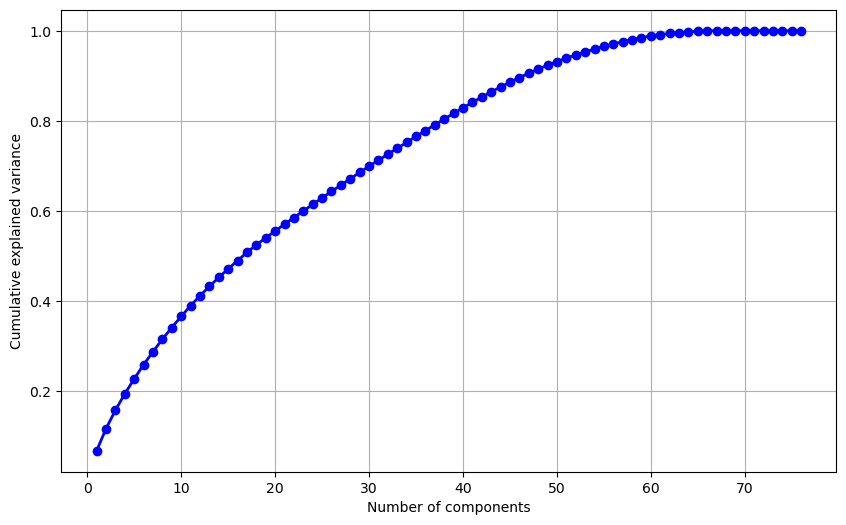

In [35]:
X = hotel.drop(['reservation_status', 'reservation_status_date', 'adr'], axis=1)

enc = OneHotEncoder(sparse=False)
one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type', 'assigned_room_type' ]
label_enc = ['country']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])
result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


# Transform the data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

In [36]:
X_pca = X_pca[:, :61]
y = hotel['adr']

X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X_pca), y.reset_index(drop = True), test_size = 0.2, random_state = 100)


reg1 = sm.OLS(y_train, X_train).fit()
y_pred = reg1.predict(X_test)
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     2516.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:45:57   Log-Likelihood:            -4.4648e+05
No. Observations:               93566   AIC:                         8.931e+05
Df Residuals:                   93504   BIC:                         8.937e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5421      0.093   1107.572      0.000     103.359     103.725
x1             7.3257      0.041    177.387      0.000       7.245       7.407
x2            -5.8853      0.048   -121.417      0.000      -5.980      -5.790
x3            -1.9954      0.053    -37.660      0.000      -2.099      -1.892
x4             5.6588      0.056    101.095      0.000       5.549       5.768
x5            -2.8832      0.059    -48.645      0.000      -2.999      -2.767
x6             6.5579      0.060    109.090      0.000       6.440       6.676
x7            -0.8576      0.063    -13.548      0.000      -0.982      -0.734
x8             1.4114      0.064     21.996      0.000       1.286       1.537
x9             0.0626      0.067      0.928      0.353      -0.070       0.195
x10            1.2469      0.068     18.293      0.000       1.113       1.380
x11            0.8673      0.070     12.479      0.000       0.731       1.004
x12           -1.6786      0.072    -23.245      0.000      -1.820      -1.537
x13            7.3365      0.074     98.647      0.000       7.191       7.482
x14           -2.4284      0.076    -31.976      0.000      -2.577      -2.280
x15          -11.5399      0.078   -148.109      0.000     -11.693     -11.387
x16            1.0304      0.073     14.099      0.000       0.887       1.174
x17            3.5140      0.080     44.066      0.000       3.358       3.670
x18            1.6427      0.083     19.770      0.000       1.480       1.806
x19            1.0401      0.085     12.175      0.000       0.873       1.208
x20            1.4490      0.087     16.578      0.000       1.278       1.620
x21           -4.0440      0.087    -46.344      0.000      -4.215      -3.873
x22           -0.6623      0.088     -7.541      0.000      -0.834      -0.490
x23           -0.3491      0.089     -3.940      0.000      -0.523      -0.175
x24           -0.8582      0.089     -9.650      0.000      -1.033      -0.684
x25            1.1742      0.089     13.152      0.000       0.999       1.349
x26            1.8950      0.090     21.140      0.000       1.719       2.071
x27           -1.3353      0.091    -14.750      0.000      -1.513      -1.158
x28           -2.9414      0.091    -32.261      0.000      -3.120      -2.763
x29            1.0266      0.091     11.234      0.000       0.847       1.206
x30           -1.4622      0.092    -15.931      0.000      -1.642      -1.282
x31           -1.9513      0.093    -20.929      0.000      -2.134      -1.769
x32           -4.0501      0.094    -43.289      0.000      -4.233      -3.867
x33            0.4348      0.092      4.716      0.000       0.254       0.615
x34            0.9510      0.087     10.975      0.000       0.781       1.121
x35           -0.6541      0.095     -6.899      0.000      -0.840      -0.468
x3

In [38]:
mse_train = mean_squared_error(y_train,reg1.predict(X_train) )
print("train error: ", mse_train)
mse_test = mean_squared_error(y_test, y_pred)
print("test_error: ", mse_test)

train error:  817.0641409676097
test_error:  853.9842408515616


In [39]:
y_2 = np.log(hotel['adr'])

X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X_pca), y_2.reset_index(drop = True), test_size = 0.2, random_state = 100)


reg2 = sm.OLS(y_train, X_train).fit()
y_pred = reg2.predict(X_test)
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     2289.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:46:45   Log-Likelihood:                -17996.
No. Observations:               93566   AIC:                         3.612e+04
Df Residuals:                   93504   BIC:                         3.670e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5406      0.001   4733.723      0.000       4.539       4.542
x1             0.0552      0.000    130.286      0.000       0.054       0.056
x2            -0.0723      0.000   -145.332      0.000      -0.073      -0.071
x3            -0.0075      0.001    -13.759      0.000      -0.009      -0.006
x4             0.0474      0.001     82.495      0.000       0.046       0.049
x5            -0.0202      0.001    -33.266      0.000      -0.021      -0.019
x6             0.0613      0.001     99.440      0.000       0.060       0.063
x7            -0.0257      0.001    -39.532      0.000      -0.027      -0.024
x8             0.0052      0.001      7.961      0.000       0.004       0.007
x9            -0.0028      0.001     -3.993      0.000      -0.004      -0.001
x10            0.0112      0.001     15.953      0.000       0.010       0.013
x11            0.0004      0.001      0.618      0.536      -0.001       0.002
x12           -0.0160      0.001    -21.622      0.000      -0.017      -0.015
x13            0.0762      0.001     99.801      0.000       0.075       0.078
x14           -0.0215      0.001    -27.570      0.000      -0.023      -0.020
x15           -0.1280      0.001   -160.103      0.000      -0.130      -0.126
x16            0.0085      0.001     11.394      0.000       0.007       0.010
x17            0.0336      0.001     41.025      0.000       0.032       0.035
x18            0.0150      0.001     17.587      0.000       0.013       0.017
x19            0.0067      0.001      7.589      0.000       0.005       0.008
x20            0.0048      0.001      5.302      0.000       0.003       0.007
x21           -0.0341      0.001    -38.087      0.000      -0.036      -0.032
x22           -0.0043      0.001     -4.804      0.000      -0.006      -0.003
x23            0.0039      0.001      4.246      0.000       0.002       0.006
x24           -0.0072      0.001     -7.897      0.000      -0.009      -0.005
x25            0.0070      0.001      7.588      0.000       0.005       0.009
x26            0.0082      0.001      8.926      0.000       0.006       0.010
x27           -0.0191      0.001    -20.529      0.000      -0.021      -0.017
x28           -0.0358      0.001    -38.271      0.000      -0.038      -0.034
x29            0.0125      0.001     13.290      0.000       0.011       0.014
x30           -0.0200      0.001    -21.245      0.000      -0.022      -0.018
x31           -0.0010      0.001     -1.040      0.298      -0.003       0.001
x32           -0.0377      0.001    -39.306      0.000      -0.040      -0.036
x33            0.0079      0.001      8.329      0.000       0.006       0.010
x34            0.0101      0.001     11.401      0.000       0.008       0.012
x35           -0.0048      0.001     -4.902      0.000      -0.007      -0.003
x3

In [40]:
mse_train = mean_squared_error(y_train,reg2.predict(X_train) )
print("train error: ", mse_train)
mse_test = mean_squared_error(y_test, y_pred)
print("test_error: ", mse_test)

train error:  0.0860179268012279
test_error:  0.08709119332142252


Text(0.5, 1.0, 'QQ Plot for Model 2')

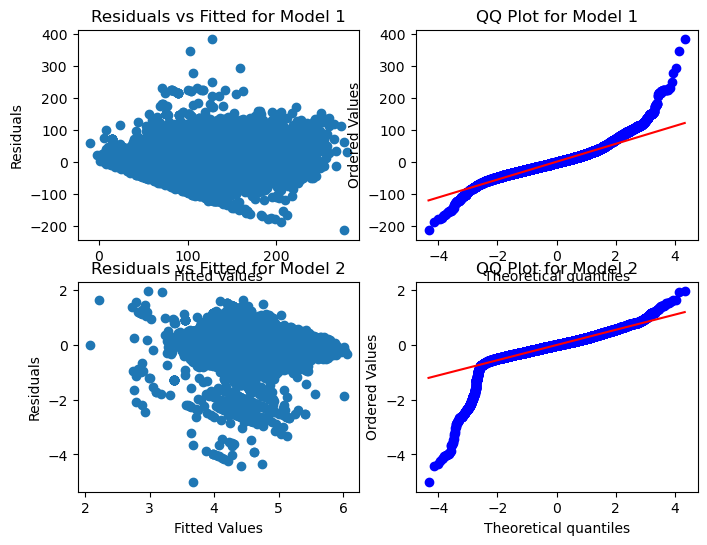

In [41]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
ax[0,0].scatter(reg1.fittedvalues, reg1.resid)
ax[0,0].set_xlabel('Fitted Values')
ax[0,0].set_ylabel('Residuals')
ax[0,0].set_title('Residuals vs Fitted for Model 1')

stats.probplot(reg1.resid, plot=ax[0,1])
ax[0,1].set_title('QQ Plot for Model 1')

ax[1,0].scatter(reg2.fittedvalues, reg2.resid)
ax[1,0].set_xlabel('Fitted Values')
ax[1,0].set_ylabel('Residuals')
ax[1,0].set_title('Residuals vs Fitted for Model 2')

stats.probplot(reg2.resid, plot=ax[1,1])
ax[1,1].set_title('QQ Plot for Model 2')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 100)

rf = RandomForestRegressor(max_features = 'sqrt')

param_grid = {
    'n_estimators': [100,200],
    'max_depth': [10,20,30],
    'min_samples_split': [2,5,10],
}
grid_search = GridSearchCV(
    rf, param_grid, cv = 3, n_jobs = -1, scoring = 'neg_mean_squared_error')
grid_search.fit(X_encoded,y)
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean squared error:', -grid_search.best_score_)

Best hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Best mean squared error: 1214.3528662909182


In [43]:
rf = RandomForestRegressor(max_features = 'sqrt', max_depth = 30, min_samples_split = 2, n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

354.32635100759205

In [44]:
gb = GradientBoostingRegressor(random_state = 100)

param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3,4,5],
    'n_estimators': [100,500]
}

grid_searchgb = GridSearchCV(gb, param_grid=param_grid, cv=3, n_jobs=-1)
grid_searchgb.fit(X_pca, y)

print('Best parameters:', grid_searchgb.best_params_)
print('Best score:', grid_searchgb.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best score: 0.48374162301181234


In [47]:

gb = GradientBoostingRegressor(
    learning_rate = grid_searchgb.best_params_['learning_rate'], 
    max_depth = grid_searchgb.best_params_['max_depth'], 
    n_estimators = grid_searchgb.best_params_['n_estimators'], random_state = 100)
gb.fit(X_train, y_train)
y_preds = gb.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

347.03400551273074

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


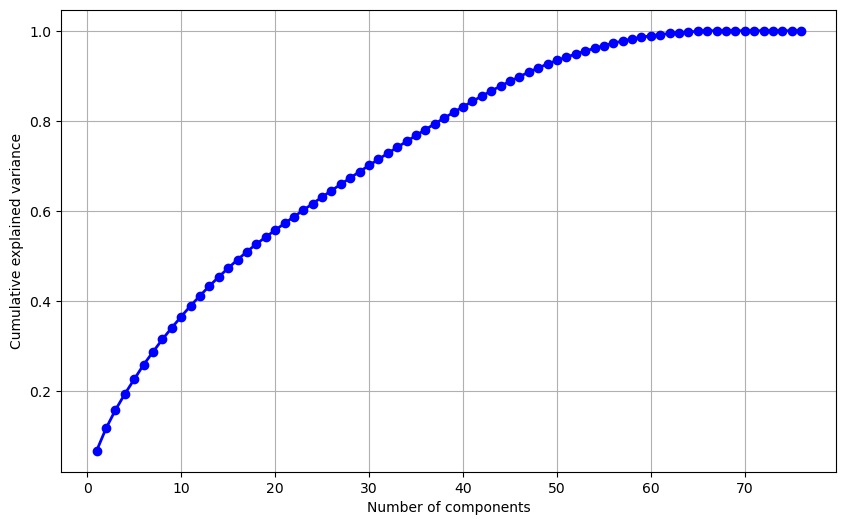

In [50]:
X = hotel.drop(['reservation_status', 'reservation_status_date', 'is_canceled'], axis=1)

enc = OneHotEncoder(sparse=False)
one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type', 'assigned_room_type' ]
label_enc = ['country']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])
result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


# Transform the data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

In [51]:
X_pca = X_pca[:, :61]
y = hotel['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(X_pca, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

lr = LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best hyperparameters:", grid_search.best_params_)

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
162 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


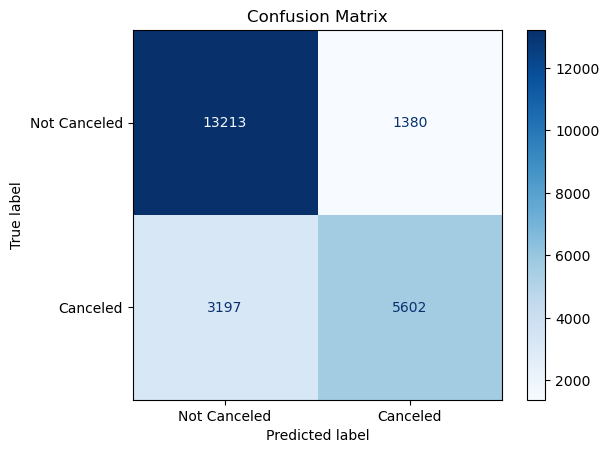

In [52]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85     14593
           1       0.80      0.64      0.71      8799

    accuracy                           0.80     23392
   macro avg       0.80      0.77      0.78     23392
weighted avg       0.80      0.80      0.80     23392



In [54]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 4, 5, 6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 4, 5],
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,  cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5}


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


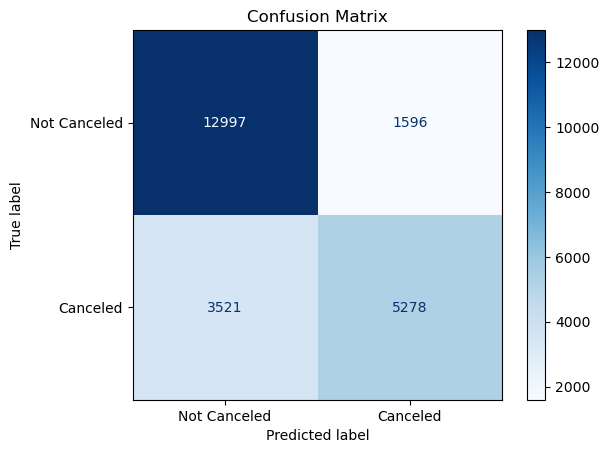

In [55]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     14593
           1       0.77      0.60      0.67      8799

    accuracy                           0.78     23392
   macro avg       0.78      0.75      0.75     23392
weighted avg       0.78      0.78      0.77     23392



In [57]:
base_estimator = best_model
param_grid = {
    'n_estimators': [10,50,100],
    'max_samples': [0.5, 1],
    'max_features': [0.5, 1]
}

bagging = BaggingClassifier(base_estimator = base_estimator)
grid_search = GridSearchCV(estimator = bagging, param_grid = param_grid, cv = 3, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}
Best score: 0.7945728237741695


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


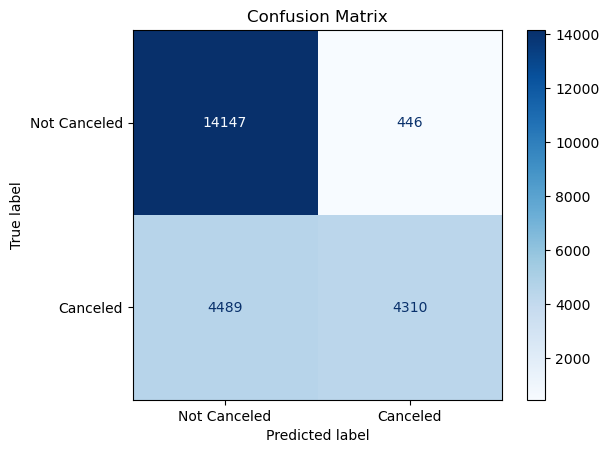

In [58]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85     14593
           1       0.91      0.49      0.64      8799

    accuracy                           0.79     23392
   macro avg       0.83      0.73      0.74     23392
weighted avg       0.81      0.79      0.77     23392



In [61]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define random forest classifier
rfc = RandomForestClassifier()

# Create grid search object with cross-validation
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit grid search object to data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


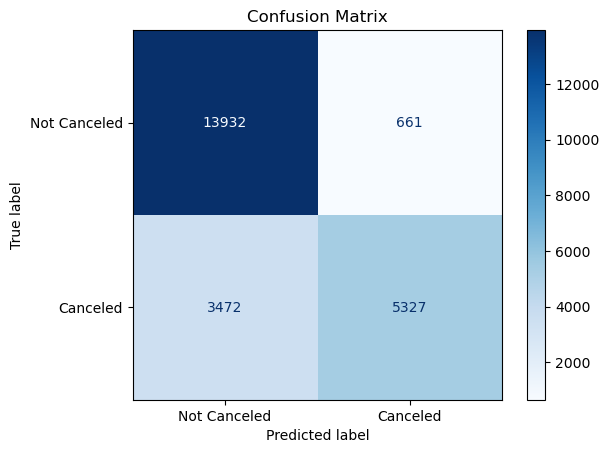

In [62]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     14593
           1       0.89      0.61      0.72      8799

    accuracy                           0.82     23392
   macro avg       0.85      0.78      0.80     23392
weighted avg       0.83      0.82      0.81     23392

